<a href="https://colab.research.google.com/github/marchemjor/Stocks-Analysis-with-Pandas-and-Scikit-Learn/blob/master/Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [198]:
fobj=pd.read_csv("AAPL.csv")
#Creating a datetime index
fobj.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
2018-09-13,223.520004,228.350006,222.570007,226.410004,222.950317,41706400
2018-09-14,225.750000,226.839996,222.520004,223.839996,220.419571,31999300
2018-09-17,222.149994,222.949997,217.270004,217.880005,214.550659,37195100
2018-09-18,217.789993,221.850006,217.119995,218.240005,214.905167,31571700
2018-09-19,218.500000,219.619995,215.300003,218.369995,215.033142,27123800
2018-09-20,220.240005,222.279999,219.149994,220.029999,216.667816,26608800


In [199]:
fobj.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [200]:
#MA
close_px = fobj['Adj Close']
mavg = close_px.rolling(window=100).mean()
print(mavg)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
17            NaN
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
          ...    
220    193.762515
221    194.119453
222    194.487473
223    194.893862
224    195.194881
225    195.432020
226    195.554824
227    195.694043
228    195.829867
229    195.990569
230    196.149358
231    196.286871
232    196.440511
233    196.572044
234    196.716401
235    196.927710
236    197.160846
237    197.391602
238    197.632951
239    197.859698
240    197.960657
241    198.086917
242    198.186503
243    198.286788
244    198

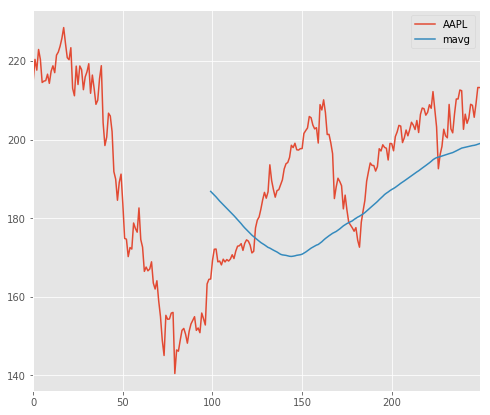

In [201]:
import matplotlib.pyplot as plt
from matplotlib import style
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__
# Adjusting the style of matplotlib
style.use('ggplot')
close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

Moving averages lag behind current price action because they are based on past prices; the longer the time period for the moving average, the greater the lag.

The Formulas For Moving Averages Are
Simple Moving Average

\begin{aligned} &SMA = \frac{A_1 + A_2 + \dotso + A_n}{n} \\ &\textbf{where:}\\ &A=\text{average in period }n\\ &n=\text{number of time periods}\\ \end{aligned} 
​	  
SMA= 
n
A 
1
​	 +A 
2
​	 +…+A 
n
​	 
​	 
where:
A=average in period n
n=number of time periods
​	

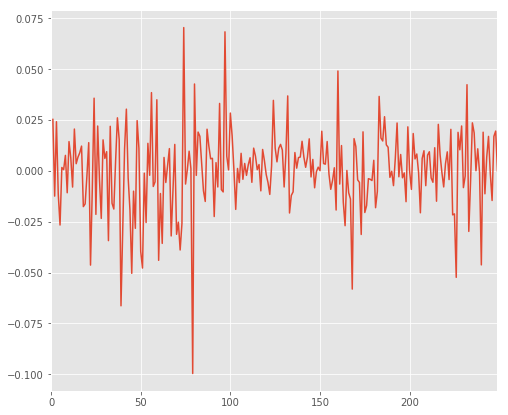

In [202]:
#plotting on returns
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

Return Deviation — to determine risk and return
Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.

# Predicting Stocks Price
We will be using three machine learning models to predict our stocks.
## Feature engineering 

In [0]:
#we will need libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import pipeline
fobjfreg = fobj.loc[:,['Adj Close','Volume']]

In [204]:
fobjfreg['HL_PCT'] = fobj['High']- fobj['Low']/ fobj['Close']*100.0
fobjfreg['Change'] = fobj['Close']- fobj['Open']/ fobj['Open']*100.0
fobjfreg.head()


,Adj Close,Volume,HL_PCT,Change
0,214.993759,39516500,122.701928,118.330002
1,220.429443,35749000,127.556652,123.850006
2,217.691925,49278700,125.556390,121.070007
3,222.950317,41706400,130.046043,126.410004
4,220.419571,31999300,127.429699,123.839996


# Pre-processing & Cross Validation
We will clean up and process the data using the following steps before putting them into the prediction models:
1.   Drop missing value
2.   Separating the label here, we want to predict the AdjClose
1.   Scale the X so that everyone can have the same distribution for linear regression
2.   Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
5.   Separate label and identify it as y
6. Separation of training and testing of model by cross validation train test split

In [0]:
# We want to separate 1 percent of the data to forecast
import math
from sklearn.model_selection import train_test_split
forecast_data = int(math.ceil(0.01 * len(fobjfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
fobjfreg['label'] = fobjfreg[forecast_col].shift(-forecast_data)
X = np.array(fobjfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
from sklearn import preprocessing 
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_data:]
X = X[:-forecast_data]
# Separate label and identify it as y
y = np.array(fobjfreg['label'])
y = y[:-forecast_data]
# Cross validation is used to split training and testing data. 
#if X is your feature and y is your label, you can get your train-test data as:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
clf = LinearRegression(n_jobs=-1)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

In [206]:
print(forecast_col)

Adj Close


In [207]:
print(X_test, y_test )

[[ 1.69779475 -0.56009013  1.70428866  1.77245452]
 [-1.14931692  1.05575388 -1.06423463 -1.12018096]
 [-0.16710645 -0.19658539 -0.2098623  -0.17393393]
 [-1.51749736  1.1825876  -1.26276678 -1.48933213]
 [ 0.67036013 -1.12334217  0.53352103  0.62446244]
 [ 0.74676694 -0.51882751  0.74661174  0.78089838]
 [ 1.17446418 -0.07279034  1.2874597   1.24591402]
 [ 0.99480539  1.47547032  1.1988101   1.06515371]
 [ 1.52998706 -0.69361897  1.48840459  1.60361836]
 [-0.24736442  1.2366945  -0.05415802 -0.25406009]
 [-1.87806802  0.89896453 -1.81450784 -1.85085203]
 [-0.27937193  0.4639111  -0.3127344  -0.28601491]
 [-1.75676695 -0.19853933 -1.70083505 -1.72923241]
 [-1.01124705 -0.77218605 -1.09577129 -1.01668527]
 [ 1.38730352  0.444149    1.50041402  1.46005926]
 [ 0.88472513 -0.78384504  0.75973407  0.83765356]
 [ 0.20805878 -0.82716935  0.198996    0.16469313]
 [-0.05186605 -0.13653046 -0.04655915 -0.0938085 ]
 [ 0.6572053  -0.48214084  0.64724772  0.57438369]
 [-0.15420791  0.80889651 -0.09

# Model Generation
## Simple Linear Analysis & Quadratic Discriminant Analysis
Simple Linear Analysis is a linear relationship between two or more variables. It generates a straigt line when you plot it. Quadratic Discriminant Analysis is relationsip between two variables with ploynomial characteristics producing a curved line.

In [208]:
from sklearn.pipeline import make_pipeline
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)
# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

## K Nearest Neighbor (KNN)
This KNN uses feature similarity to predict values of data points. This ensures that the new point assigned is similar to the points in the data set. To find out similarity, we will extract the points to release the minimum distance (e.g: Euclidean Distance).

In [209]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

## Evaluation
A simple quick and dirty way to evaluate is to use the score method in each trained model. The score method finds the mean accuracy of self.predict(X) with y of the test data set.

In [0]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

In [211]:
print(confidencereg)
print(confidencepoly2)
print(confidencepoly3)
print(confidenceknn)

0.9359442415280995
0.9364416782788315
0.937513746965965
0.9026360197424201


In [214]:
forecast_set = clf.predict(X_lately)
fobjfreg['Forecast'] = np.nan
print(forecast_set)

[209.52526587 213.19141471 213.34802729]


References
https://pythonprogramming.net/forecasting-predicting-machine-learning-tutorial/
https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7